In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_model_optimization as tfmot
import tensorflow as tf
import os
import tempfile
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [2]:
dataset = pd.read_excel('train_3rd_wrv_SNR45db.xlsx').values

In [3]:
train_percentage = 80
val_percentage = 20
def slice_dataset(dataset, percentage):
    data_size = len(dataset)
    index = [i for i in range (len(dataset))]
    np.random.shuffle(index)
    dataset_random = dataset[index,:]
    return dataset_random[:int(data_size*percentage/100)],dataset_random[int(data_size*percentage/100):]
train_dataset,val_dataset = slice_dataset(dataset, train_percentage)
X_train = np.expand_dims(train_dataset[:,0:5200].astype(float),axis =2)
Y_train = np.expand_dims(train_dataset[:,7000].astype(float),axis =1)
X_val = np.expand_dims(val_dataset[:,0:5200].astype(float),axis =2)
Y_val = np.expand_dims(val_dataset[:,7000].astype(float),axis =1)

In [10]:
f_input = 5200
f_output = 1
def setup_model():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape =(f_input,1)),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.Flatten(),
        #eras.layers.Reshape(target_shape=(99,1,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.01),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(f_output, activation='linear'),
    ])
    return model

In [11]:
base_model = setup_model()
base_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mse'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor = 0.5, patience=20, mode='auto')
log_filepath = os.path.join('log')
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath,histogram_freq=1)
history = base_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200,batch_size=16,callbacks=[reduce_lr])
scores = base_model.evaluate(X_val, Y_val, verbose=0)
#model.save(os.path.join(log_filepath,'DNN_model.h5'))
print('%s: %.2f%%' % (base_model.metrics_names[1], scores[1] * 100))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - ETA: 0s - loss: 3.4148 - mse: 3.4148WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002E342D96D38> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

55/55 [==============================] - 4s 80ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.2187 - val_mse: 0.2187 - lr: 0.0010
Epoch 45/200
55/55 [==============================] - 4s 79ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.1569 - val_mse: 0.1569 - lr: 0.0010
Epoch 46/200
55/55 [==============================] - 4s 81ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.1821 - val_mse: 0.1821 - lr: 0.0010
Epoch 47/200
55/55 [==============================] - 4s 80ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.1793 - val_mse: 0.1793 - lr: 0.0010
Epoch 48/200
55/55 [==============================] - 5s 83ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.1818 - val_mse: 0.1818 - lr: 0.0010
Epoch 49/200
55/55 [==============================] - 5s 82ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.2059 - val_mse: 0.2059 - lr: 0.0010
Epoch 50/200
55/55 [==============================] - 5s 83ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.1947 - val_mse: 0.1947 - lr

55/55 [==============================] - 5s 82ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.1631 - val_mse: 0.1631 - lr: 2.5000e-04
Epoch 100/200
55/55 [==============================] - 4s 81ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.1613 - val_mse: 0.1613 - lr: 2.5000e-04
Epoch 101/200
55/55 [==============================] - 5s 83ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.1622 - val_mse: 0.1622 - lr: 2.5000e-04
Epoch 102/200
55/55 [==============================] - 4s 81ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.1635 - val_mse: 0.1635 - lr: 2.5000e-04
Epoch 103/200
55/55 [==============================] - 4s 82ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.1635 - val_mse: 0.1635 - lr: 2.5000e-04
Epoch 104/200
55/55 [==============================] - 5s 84ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.1597 - val_mse: 0.1597 - lr: 2.5000e-04
Epoch 105/200
55/55 [==============================] - 4s 82ms/step - loss: 0.0036 - mse: 0.0036 - val_loss:

55/55 [==============================] - 5s 83ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.1563 - val_mse: 0.1563 - lr: 3.1250e-05
Epoch 154/200
55/55 [==============================] - 4s 82ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.1604 - val_mse: 0.1604 - lr: 3.1250e-05
Epoch 155/200
55/55 [==============================] - 5s 83ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.1578 - val_mse: 0.1578 - lr: 3.1250e-05
Epoch 156/200
55/55 [==============================] - 4s 82ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.1547 - val_mse: 0.1547 - lr: 3.1250e-05
Epoch 157/200
55/55 [==============================] - 4s 81ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.1600 - val_mse: 0.1600 - lr: 3.1250e-05
Epoch 158/200
55/55 [==============================] - 4s 80ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.1587 - val_mse: 0.1587 - lr: 3.1250e-05
Epoch 159/200
55/55 [==============================] - 4s 82ms/step - loss: 0.0012 - mse: 0.0012 - val_loss:

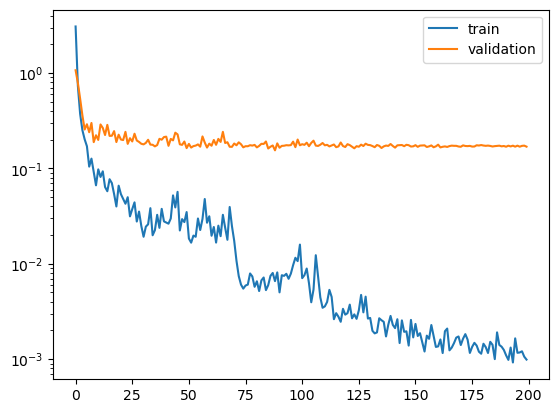

In [6]:
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [7]:
predicted =base_model.predict(X_val)
#inverse_data1 = min_max_scaler.inverse_transform(predicted)
#inverse_data2 = min_max_scaler.inverse_transform(Y_test)
print(predicted[1])
print(Y_val[1].reshape(1))
ERR = []
for i in range(0,len(Y_val)):
    error=(predicted[i]-Y_val[i].reshape(1))
    ERR.append(error)
ERR=np.abs(np.array(ERR))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 25ms/step
[5.9445295]
[6.]


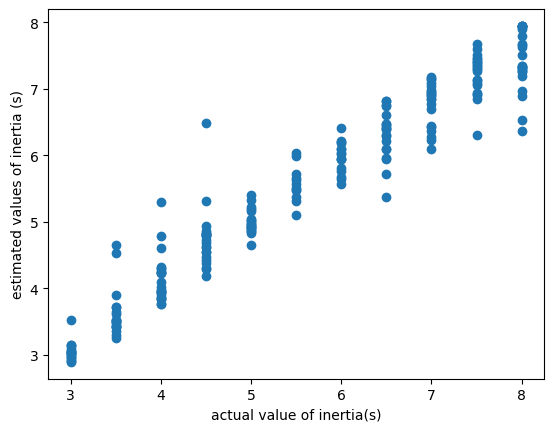

In [8]:
plt.xlabel('actual value of inertia(s)')
plt.ylabel('estimated values of inertia (s)')
plt.scatter(Y_val,predicted)
plt.savefig('Scatters_CNN_Delay_0.0.png',dpi=1000)
plt.show()

In [9]:
#print(ERR)
absvalues  = ERR.reshape(-1)
def acc(thre):
    Accuracy = np.sum(absvalues<=thre)/len(absvalues)
    return  Accuracy
print('\nTolerance=0.1: Accuracy=',  acc(0.1),
      '\nTolerance=0.2: Accuracy=',  acc(0.2),
      '\nTolerance=0.3: Accuracy=',  acc(0.3),
    '\nTolerance=0.4: Accuracy=', acc(0.4),'\nTolerance=0.5: Accuracy=',  acc(0.5))


Tolerance=0.1: Accuracy= 0.36363636363636365 
Tolerance=0.2: Accuracy= 0.5681818181818182 
Tolerance=0.3: Accuracy= 0.6909090909090909 
Tolerance=0.4: Accuracy= 0.7909090909090909 
Tolerance=0.5: Accuracy= 0.8318181818181818
